In [2]:
import numpy as np
import matplotlib.pyplot as plt


## BACKTRACKING
(variable stepsize)

In [3]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

## FIRST TASK
implement gradient descent algorithm with following parameters:
loss function (f), its gradient, strarting guess, two stopping criterions (tolf and tolx), and max number of iterations (kmax).
As outputs we want:
- x -> stationary point
- f_val -> the vector containing the values of f during the iterations
- err_vall -> vector containing the values of ||grad_f(x, k)||

we have a fixed stepsize (alpha=1)

4
-1.00164583595259
gradient of final x=-0.0032916719051798715


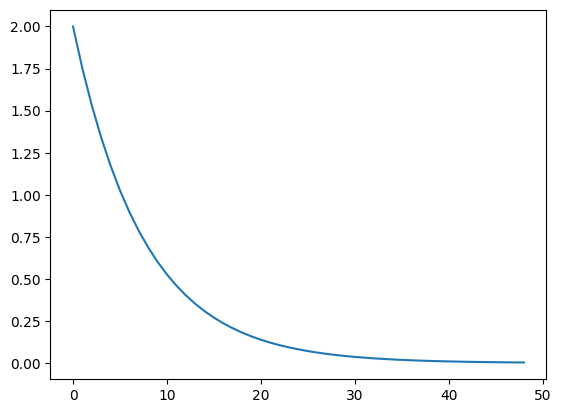

In [11]:
def GD(f, grad_f, x0, tolf, tolx, kmax):
    #initialization
    a=1 #stepsize
    f_val=np.zeros((kmax,))
    err_val=np.zeros((kmax,))

    #iterations
    k=0
    conditions=True
    while (conditions):
        #update a
        if(k!=0):
            a=backtracking(f, grad_f, x)
        #update x
        x=x0-a*grad_f(x0)
        #store values
        f_val[k]=f(x)
        err_val[k]=np.linalg.norm(grad_f(x))
        #update k
        k+=1
        #update conditions
        #stopcond1=np.linalg.norm(grad_f(f(x))) 
        #stopcond2=np.linalg.norm(x-x0) 
        conditions=k<kmax-1 
        #restart
        x0=x
    #truncate vectors -> not mandatory (visualization purposes in case of convergence in k 
    f_val=f_val[:k]
    err_val=err_val[:k]
    return x, f_val, err_val

def f(x):
    return x**2 +2*x +1

def grad_f(x):
    return 2*x+2

print(grad_f(1))
xfin, f_val, err_val=GD(f, grad_f, 0, 1e-6, 1e-6, 50)
print(xfin)
plt.plot(err_val)
print(f"gradient of final x={grad_f(xfin)}")

Gradient descent for: $$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$$
Whose gradient is: $(2x_1 -6, 2x_2-2)$

[3. 1.]


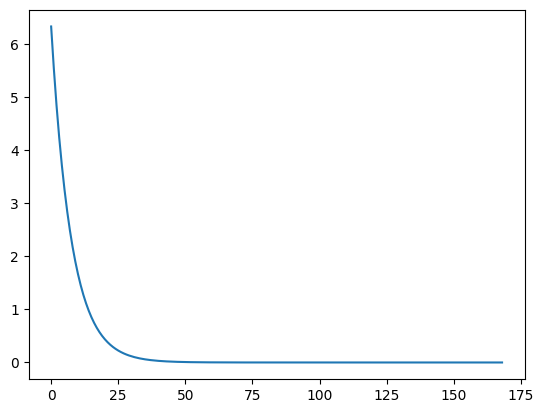

In [18]:
def f1(x):
    res=(x[0]-3)**2 + (x[1]-1)**2
    return res
def grad_f1(x):
    return np.array((2*x[0] -6, 2*x[1]-2))

x0=np.array((0,0))
xfin, f_val, err_val=GD(f1, grad_f1, x0, 1e-6, 1e-6, 170)
print(xfin)
plt.plot(err_val)

Gradient descent for: $$f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$
Whose gradient is: $(20x_1 -20, 2x_2-4)$

In [31]:
def f2(x):
    res=10*(x[0]-1)**2 + (x[1]-2)**2
    return res
def grad_f1(x):
    return np.array((20*x[0] -20, 2*x[1]-4))

x0=np.array((0,0))
xfin, f_val, err_val=GD(f1, grad_f1, x0, 1e-6, 1e-6, 2000)
print(xfin)
#plt.plot(err_val)

[1.         1.96486375]


## contour plot example
of function a function f:R^2 -> R

(30,) (30,)
(30, 30) (30, 30)


Text(0.5, 1.0, 'contour plot')

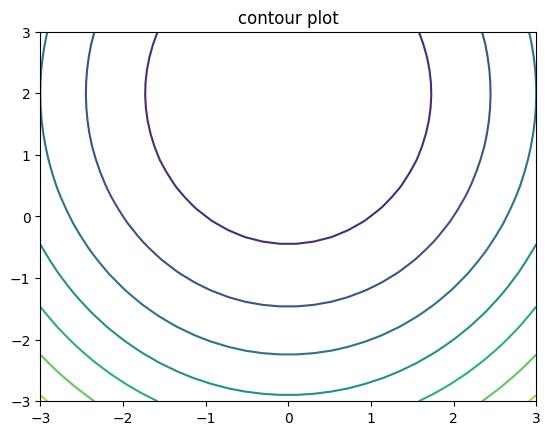

In [ ]:
def f(x1, x2):
    return 2*x1**2+ (x2-2)**2

xv=np.linspace(-3,3,30)
yv=np.linspace(-3,3,30)
xx, yy = np.meshgrid(xv, yv)
print (xv.shape, yv.shape)
print(xx.shape, yy.shape)
#the element in position xx[i, j] is the x-coordinate of the intersection i, j into the grid

#compute the value of f over the grid
zz=f(xx, yy)
#plot conrour plot
plt.contour(xx, yy, zz)
plt.title("contour plot")